# Predicting Air Quality

Dataset: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment/code

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
air = pd.read_csv("updated_pollution_dataset.csv")
df = air.copy()

In [3]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
df.shape

(5000, 10)

In [6]:
df.nunique()

Temperature                      362
Humidity                         723
PM2.5                            815
PM10                             955
NO2                              445
SO2                              348
CO                               265
Proximity_to_Industrial_Areas    179
Population_Density               683
Air Quality                        4
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,5000.0,30.029020,6.720661,13.40,25.10,29.00,34.000,58.60
Humidity,5000.0,70.056120,15.863577,36.00,58.30,69.80,80.300,128.10
PM2.5,5000.0,20.142140,24.554546,0.00,4.60,12.00,26.100,295.00
PM10,5000.0,30.218360,27.349199,-0.20,12.30,21.70,38.100,315.80
NO2,5000.0,26.412100,8.895356,7.40,20.10,25.30,31.900,64.90
SO2,5000.0,10.014820,6.750303,-6.20,5.10,8.00,13.725,44.90
CO,5000.0,1.500354,0.546027,0.65,1.03,1.41,1.840,3.72
Proximity_to_Industrial_Areas,5000.0,8.425400,3.610944,2.50,5.40,7.90,11.100,25.80
Population_Density,5000.0,497.423800,152.754084,188.00,381.00,494.00,600.000,957.00


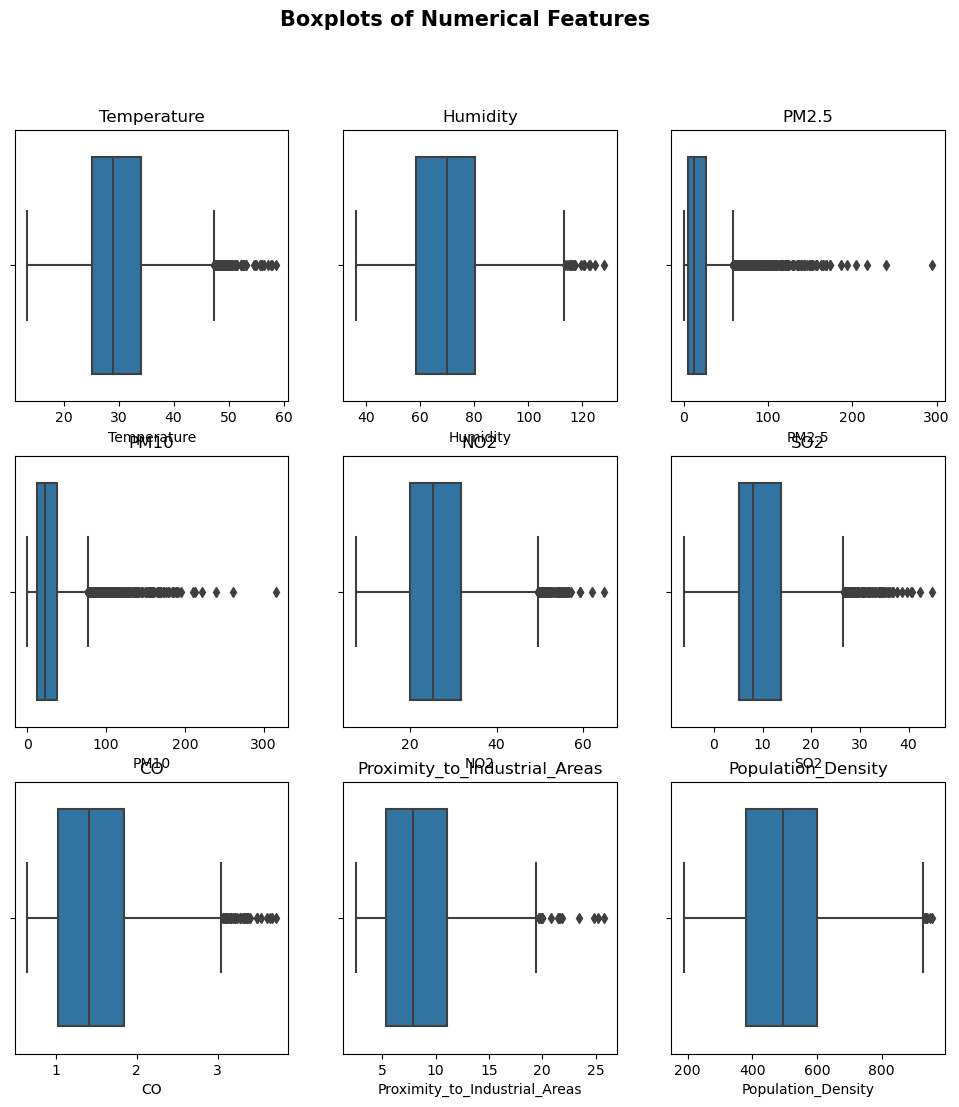

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, column in enumerate(df.select_dtypes(include=["float64", "int64"])):
    sns.boxplot(x=df[column], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(column)
    
plt.suptitle("Boxplots of Numerical Features", fontsize=15, fontweight="bold")
plt.show()

We have some outliers as it seems. Let's handle them.

In [9]:
for column in df.select_dtypes(include=["float64", "int64"]).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,5000.0,29.977300,6.562749,13.40,25.10,29.00,34.000,47.3500
Humidity,5000.0,70.036240,15.804219,36.00,58.30,69.80,80.300,113.3000
PM2.5,5000.0,17.993440,17.198269,0.00,4.60,12.00,26.100,58.3500
PM10,5000.0,28.215900,20.602156,-0.20,12.30,21.70,38.100,76.8000
NO2,5000.0,26.364280,8.753225,7.40,20.10,25.30,31.900,49.6000
SO2,5000.0,9.911630,6.430183,-6.20,5.10,8.00,13.725,26.6625
CO,5000.0,1.498345,0.539610,0.65,1.03,1.41,1.840,3.0550
Proximity_to_Industrial_Areas,5000.0,8.419160,3.587946,2.50,5.40,7.90,11.100,19.6500
Population_Density,5000.0,497.406700,152.704773,188.00,381.00,494.00,600.000,928.5000


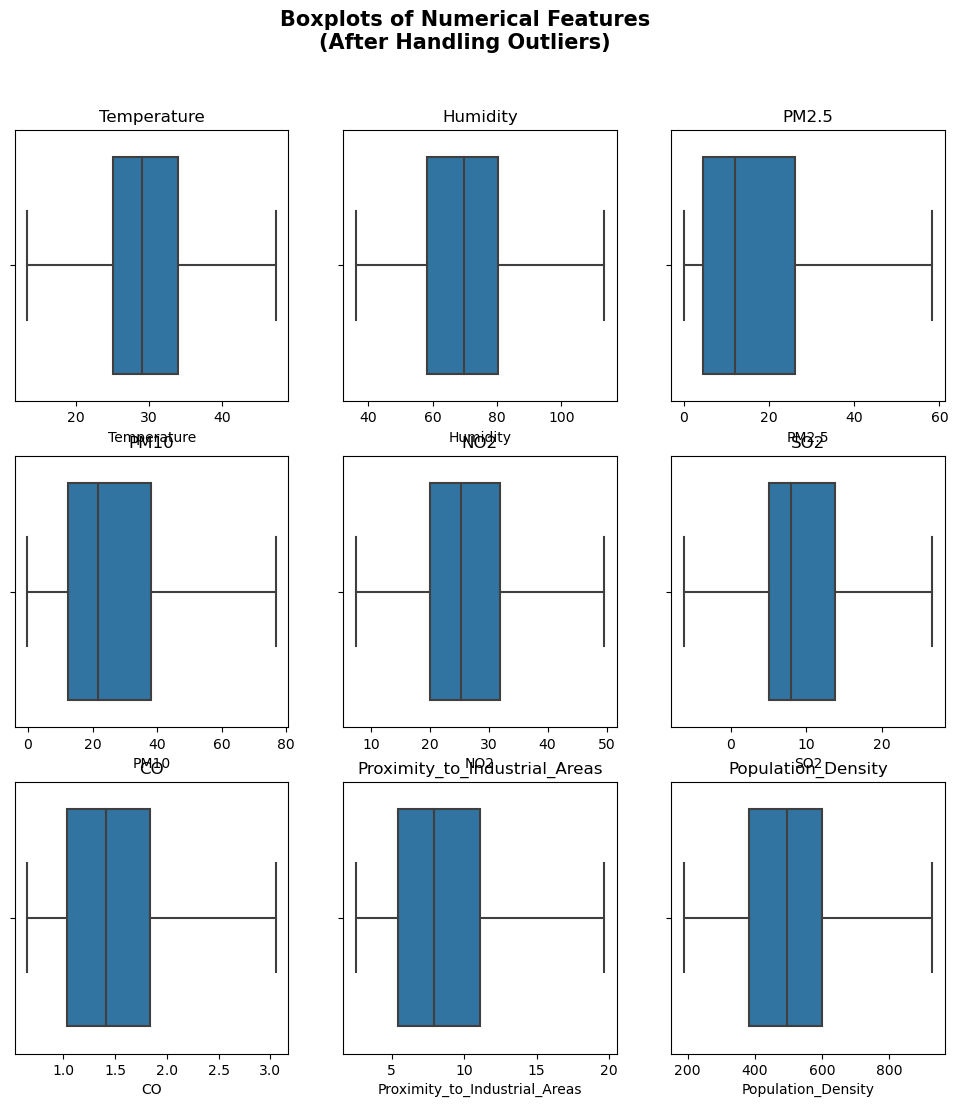

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, column in enumerate(df.select_dtypes(include=["float64", "int64"])):
    sns.boxplot(x=df[column], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(column)
    
plt.suptitle("Boxplots of Numerical Features\n(After Handling Outliers)", fontsize=15, fontweight="bold")
plt.show()

## Visual Analysis

In [12]:
df.dtypes

Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density               float64
Air Quality                       object
dtype: object

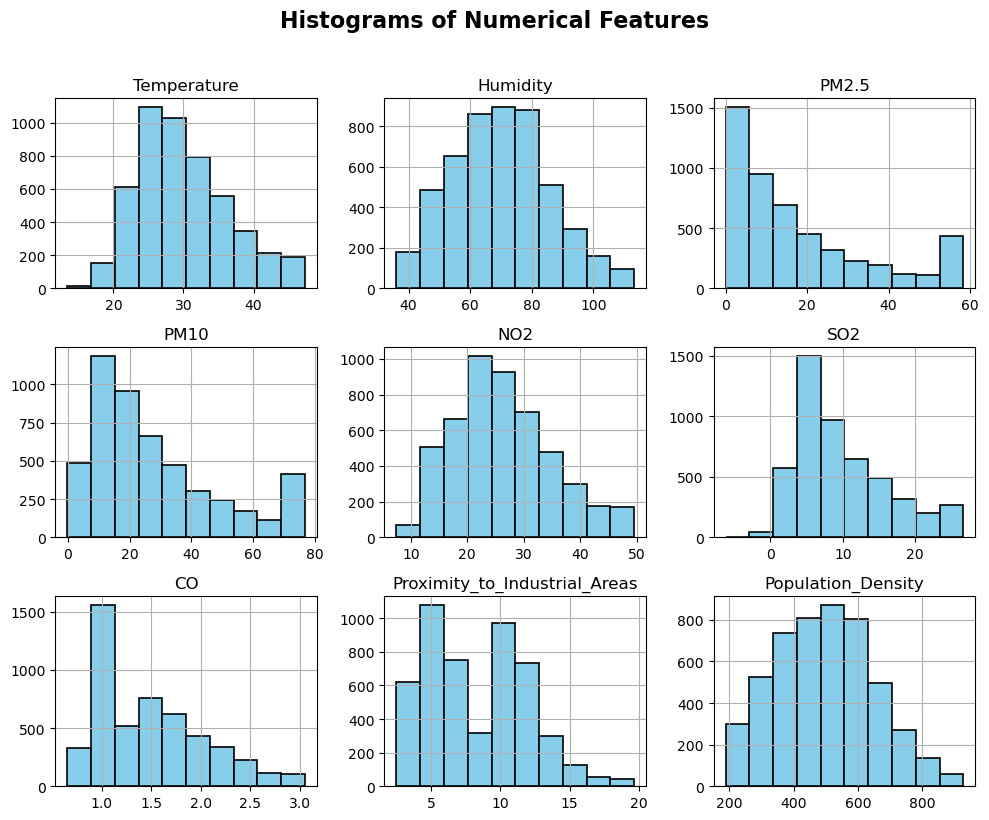

In [13]:
df.hist(figsize=(10, 8), color="skyblue", edgecolor="black", linewidth=1.2)
plt.suptitle("Histograms of Numerical Features", fontsize=16, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()

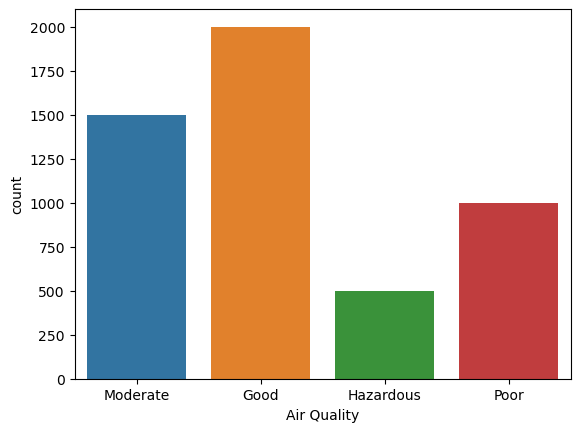

In [14]:
sns.countplot(data=df, x="Air Quality")
plt.show()

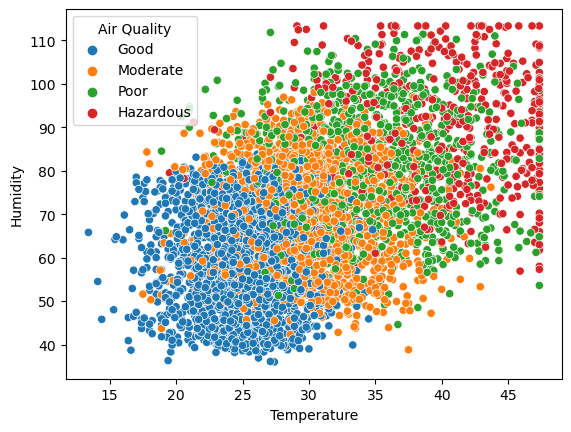

In [15]:
order = ["Good", "Moderate", "Poor", "Hazardous"]

sns.scatterplot(data=df, x="Temperature", y="Humidity", hue="Air Quality", hue_order=order)
plt.show()

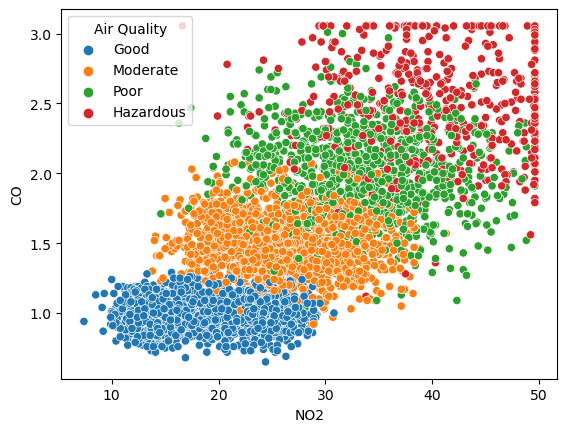

In [16]:
sns.scatterplot(data=df, x="NO2", y="CO", hue="Air Quality", hue_order=order)
plt.show()

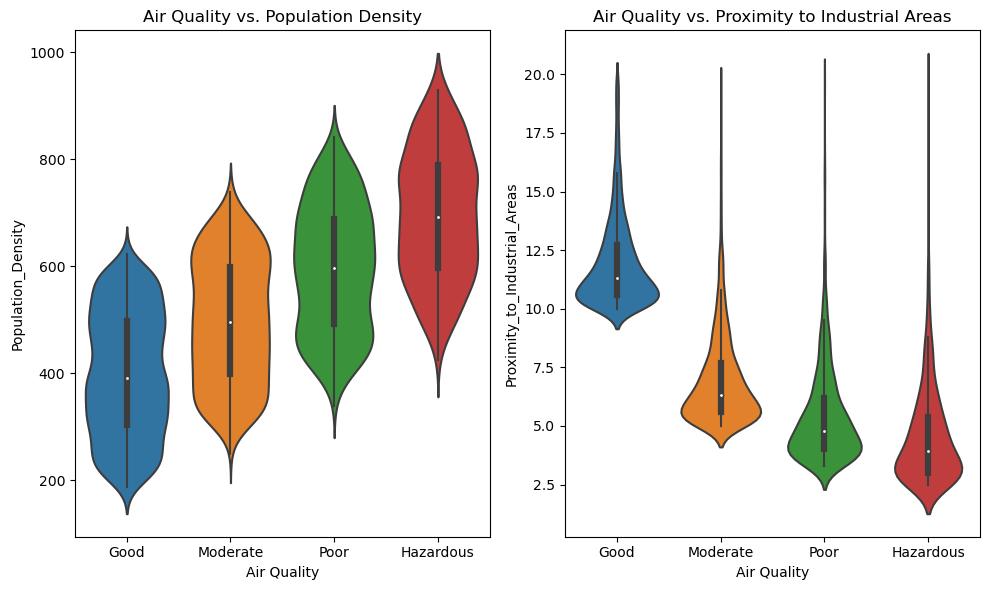

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

sns.violinplot(data=df, x="Air Quality", y="Population_Density", order=order, ax=ax1)
ax1.set_title("Air Quality vs. Population Density")

sns.violinplot(data=df, x="Air Quality", y="Proximity_to_Industrial_Areas", order=order, ax=ax2)
ax2.set_title("Air Quality vs. Proximity to Industrial Areas")

plt.tight_layout()
plt.show()

## Encoding

In [18]:
df.dtypes

Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density               float64
Air Quality                       object
dtype: object

In [19]:
df["Air Quality"].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

In [20]:
mapping = {"Good": 0, "Moderate": 1, "Poor": 2, "Hazardous": 3}
df["Air Quality Encoded"] = df["Air Quality"].map(mapping)

df_encoded = df.drop(columns=["Air Quality"])

In [21]:
df_encoded.dtypes

Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density               float64
Air Quality Encoded                int64
dtype: object

## Modeling and Predictions

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
y = df_encoded["Air Quality Encoded"]
X = df_encoded.drop(columns=["Air Quality Encoded"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Random Forests

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf_model = RandomForestClassifier(random_state=42)

In [26]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [27]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                          cv=10, scoring="accuracy", n_jobs=-1, verbose=2)

In [28]:
start_time = time.time()

grid_search.fit(X_train, y_train)

end_time = time.time()

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [29]:
fit_time = end_time - start_time
print(f"Random Forest Fit Time: {fit_time:.2f} seconds")

Random Forest Fit Time: 26.01 seconds


In [30]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score:  0.9560000000000001


In [31]:
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

In [32]:
start_time = time.time()

best_rf_model.fit(X_train, y_train)

end_time = time.time()

In [33]:
fit_time = end_time - start_time
print(f"Random Forest Fit Time: {fit_time:.2f} seconds")

Random Forest Fit Time: 1.75 seconds


In [34]:
y_pred_rf = best_rf_model.predict(X_test)

#### Analysis

In [35]:
acc_rf = accuracy_score(y_test, y_pred_rf)

print(acc_rf)

0.9528


In [36]:
confusion_matrix(y_test, y_pred_rf)

array([[508,   0,   0,   0],
       [  0, 369,  12,   0],
       [  0,  11, 203,  15],
       [  0,   1,  20, 111]], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       508
           1       0.97      0.97      0.97       381
           2       0.86      0.89      0.88       229
           3       0.88      0.84      0.86       132

    accuracy                           0.95      1250
   macro avg       0.93      0.92      0.93      1250
weighted avg       0.95      0.95      0.95      1250



In [38]:
# Overfitting Check 

train_score_rf = accuracy_score(y_train, best_rf_model.predict(X_train))
test_score_rf = accuracy_score(y_test, best_rf_model.predict(X_test))

print("RF Train Score: ", train_score_rf)
print("RF Test Score: ", test_score_rf)

RF Train Score:  1.0
RF Test Score:  0.9528


Looks like our rf model performs well on both train and test sets.

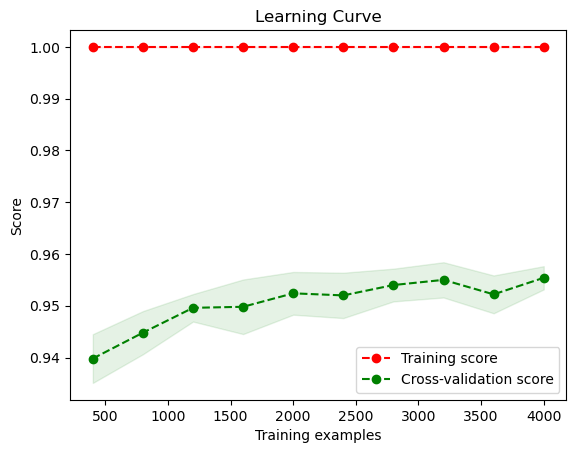

In [39]:
# Learning Curve 

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_rf_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, "o--", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o--", color="g", label="Cross-validation score")
plt.fill_between (train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between (train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

In [40]:
# Error Analysis

misclassified = X_test[y_test != y_pred_rf]

error_analysis_df = pd.DataFrame(misclassified, columns=X.columns)
error_analysis_df["Actual"] = y_test[y_test != y_pred_rf]
error_analysis_df["Predicted"] = y_pred_rf[y_test != y_pred_rf]

print(error_analysis_df)

      Temperature  Humidity  PM2.5  PM10   NO2      SO2    CO  \
915         37.00      76.5  22.50  35.0  38.0  26.6625  2.31   
2515        33.30      73.0   7.00  23.0  24.2   6.6000  1.83   
2633        36.20      73.7   9.60  32.4  41.4  25.5000  1.97   
227         34.50      86.1   9.00  21.6  39.1   7.5000  1.79   
3181        47.35      53.6   6.00  21.7  40.5   9.1000  2.46   
3849        31.50      67.4  36.00  49.0  48.1  14.3000  2.34   
2131        32.60      87.7  58.35  76.8  33.7   9.4000  1.70   
1057        21.00      94.7   7.60  16.7  35.6   9.9000  1.70   
1973        42.60      98.3   5.80  11.7  35.4  25.2000  2.33   
3821        36.60      91.9  10.50  20.2  22.9   5.5000  1.58   
3591        35.60      88.7  58.35  75.5  28.9  13.2000  1.34   
3276        39.00      76.1   9.40  22.0  37.0  14.4000  2.45   
2417        33.00      93.1  58.35  76.8  30.2  26.6625  3.01   
3673        38.80      75.4  58.35  76.8  27.8  16.1000  2.45   
1292        40.30      66

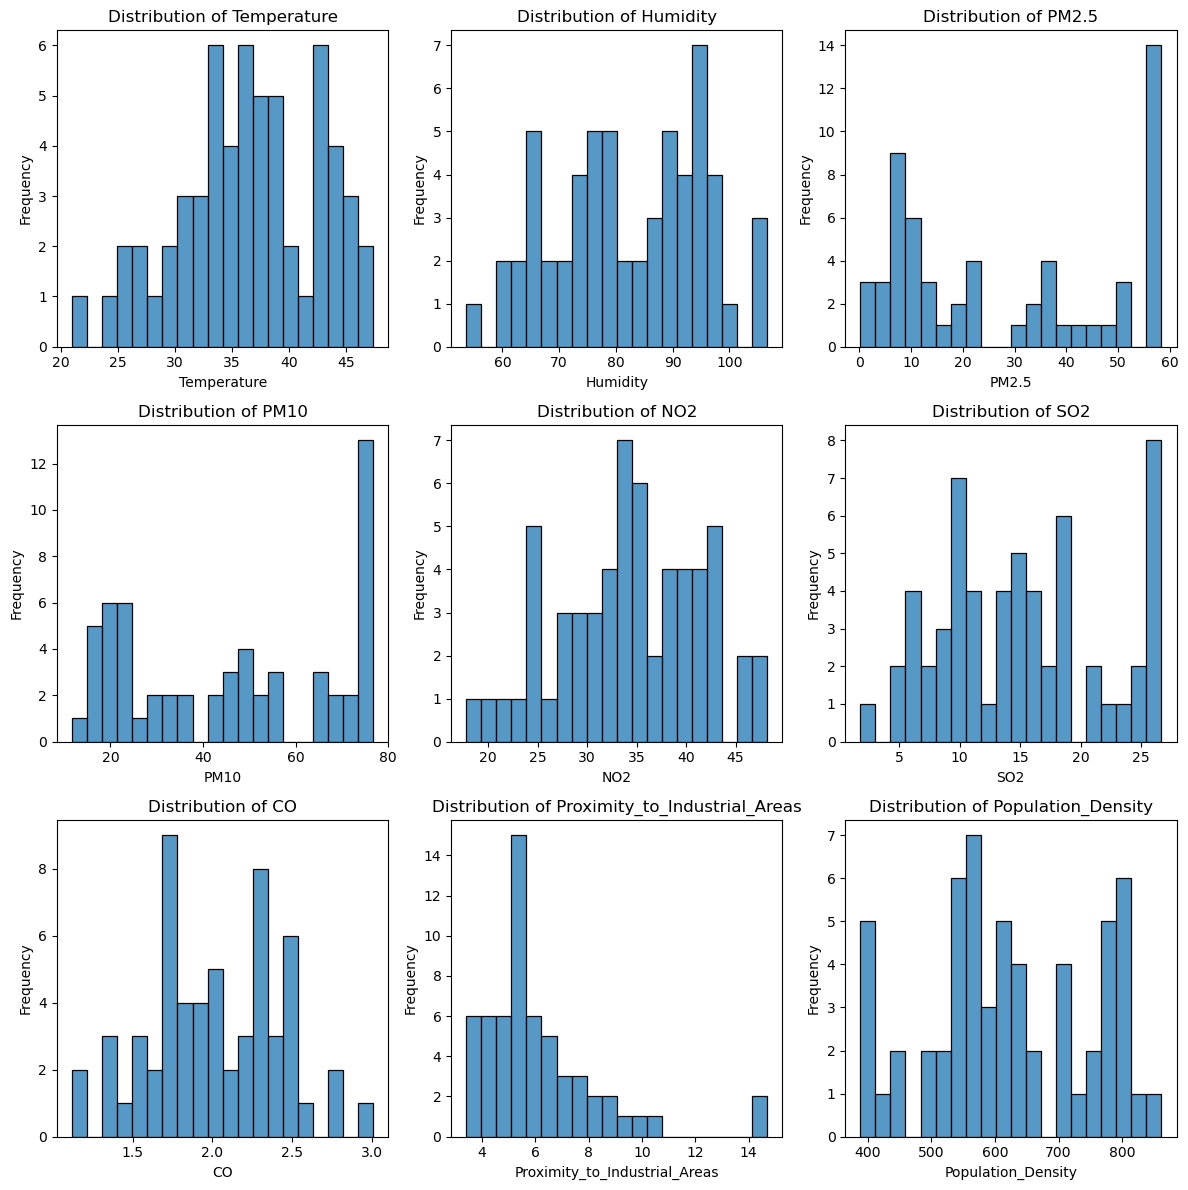

In [41]:
features = df_encoded.drop(columns=["Air Quality Encoded"]).columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12), sharex=False, sharey=False)

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.histplot(error_analysis_df[feature], kde=False, bins=20, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn_model = KNeighborsClassifier()

In [44]:
param_grid = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidian', 'manhattan', 'minkowski']
}

In [45]:
grid_search = GridSearchCV(knn_model, param_grid, 
                           cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

In [46]:
start_time = time.time()

grid_search.fit(X_train, y_train)

end_time = time.time()

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


In [47]:
fit_time = end_time - start_time

print(f"KNN Fit Time: {fit_time:.2f} seconds")

KNN Fit Time: 1.64 seconds


In [48]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
Best Score:  0.8392


In [49]:
best_knn_model = KNeighborsClassifier(**best_params)

In [50]:
start_time = time.time()

best_knn_model.fit(X_train, y_train)

end_time = time.time()

In [51]:
fit_time = end_time - start_time

print(f"KNN Fit Time: {fit_time:.2f} seconds")

KNN Fit Time: 0.01 seconds


In [52]:
y_pred_knn = best_knn_model.predict(X_test)

#### Analysis

In [53]:
acc_knn = accuracy_score(y_test, y_pred_knn)

acc_knn

0.8296

In [54]:
confusion_matrix(y_test, y_pred_knn)

array([[498,  10,   0,   0],
       [ 37, 302,  42,   0],
       [  0,  56, 164,   9],
       [  0,   2,  57,  73]], dtype=int64)

In [55]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       508
           1       0.82      0.79      0.80       381
           2       0.62      0.72      0.67       229
           3       0.89      0.55      0.68       132

    accuracy                           0.83      1250
   macro avg       0.82      0.76      0.78      1250
weighted avg       0.84      0.83      0.83      1250



We can compare the best neighbor number with the neighbor number that we recently found in the parameters of best_knn_model.

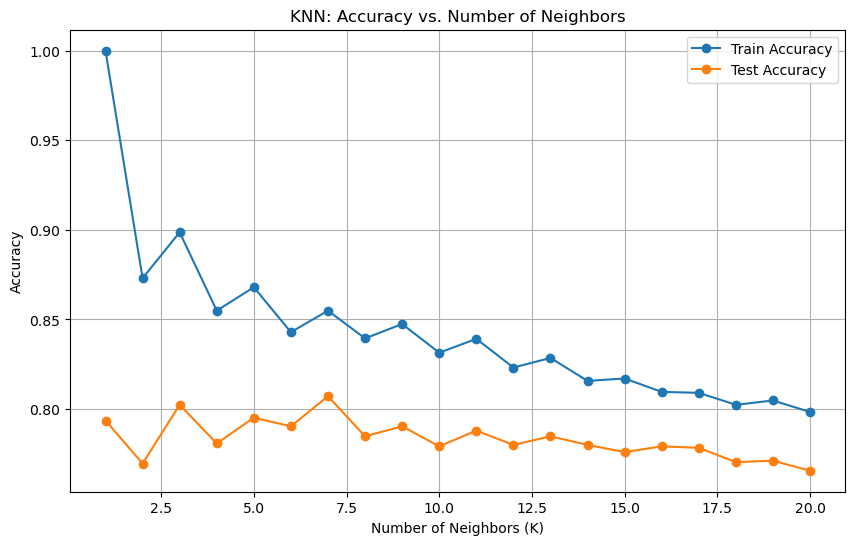

In [56]:
neighbors = np.arange(1, 21)
train_accuracies = []
test_accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
        
    train_accuracies.append(accuracy_score(y_train, knn.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, knn.predict(X_test)))
    
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracies, label="Train Accuracy", marker="o")
plt.plot(neighbors, test_accuracies, label="Test Accuracy", marker="o")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN: Accuracy vs. Number of Neighbors")
plt.legend()
plt.grid(True)
plt.show()

As we see, the more neighbors the model has, the accuracy decreases.

In [57]:
# Overfitting Check

y_train_pred = best_knn_model.predict(X_train)
y_test_pred = best_knn_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 1.0
Test Accuracy: 0.8296


It seems we have an overfitting issue. We'll address this by identifying the optimal number of neighbors using a plot above and refitting the model.

In [58]:
best_knn_model = KNeighborsClassifier(n_neighbors=8)

best_knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [59]:
y_pred_knn = best_knn_model.predict(X_test)

In [60]:
acc_knn = accuracy_score(y_test, y_pred_knn)

acc_knn

0.7848

In [61]:
# Overfitting Check

y_train_pred = best_knn_model.predict(X_train)
y_test_pred = best_knn_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.8394666666666667
Test Accuracy: 0.7848


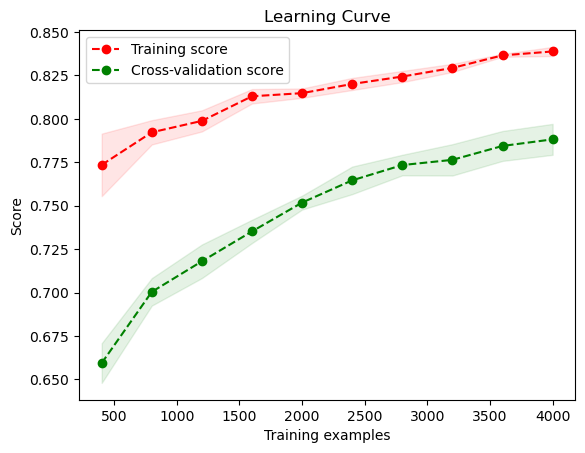

In [62]:
# Learning Curve 

train_sizes, train_scores, test_scores = learning_curve(best_knn_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, "o--", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o--", color="g", label="Cross-validation score")
plt.fill_between (train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between (train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

The larger dataset we have, the better score we are likely to achieve with this model.

In [63]:
# Error Analysis

misclassified = X_test[y_test != y_pred_knn]

error_analysis_df = pd.DataFrame(misclassified, columns=X.columns)
error_analysis_df["Actual"] = y_test[y_test != y_pred_knn]
error_analysis_df["Predicted"] = y_pred_rf[y_test != y_pred_knn]

print(error_analysis_df)

      Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
2653         25.4      78.6    4.1   6.7  21.3   9.1  1.40   
1600         23.3      70.8   23.7  36.1  23.5   8.4  1.43   
1117         31.8      67.3   17.7  23.4  22.1   9.6  2.49   
486          32.3      63.1    3.0  12.2  18.1  12.3  1.36   
2515         33.3      73.0    7.0  23.0  24.2   6.6  1.83   
...           ...       ...    ...   ...   ...   ...   ...   
1164         25.7      71.4   13.9  18.5  22.2   6.4  1.41   
1162         27.4      77.3    0.7  12.2  25.3   5.3  1.57   
3694         25.8      76.1   51.9  64.4  24.9  16.5  1.93   
3153         24.6      78.6    8.0  12.4  23.1   4.4  0.98   
452          40.9      81.8    0.7  15.7  27.7  17.9  1.82   

      Proximity_to_Industrial_Areas  Population_Density  Actual  Predicted  
2653                           10.1               543.0       1          1  
1600                            7.6               450.0       1          1  
1117                    

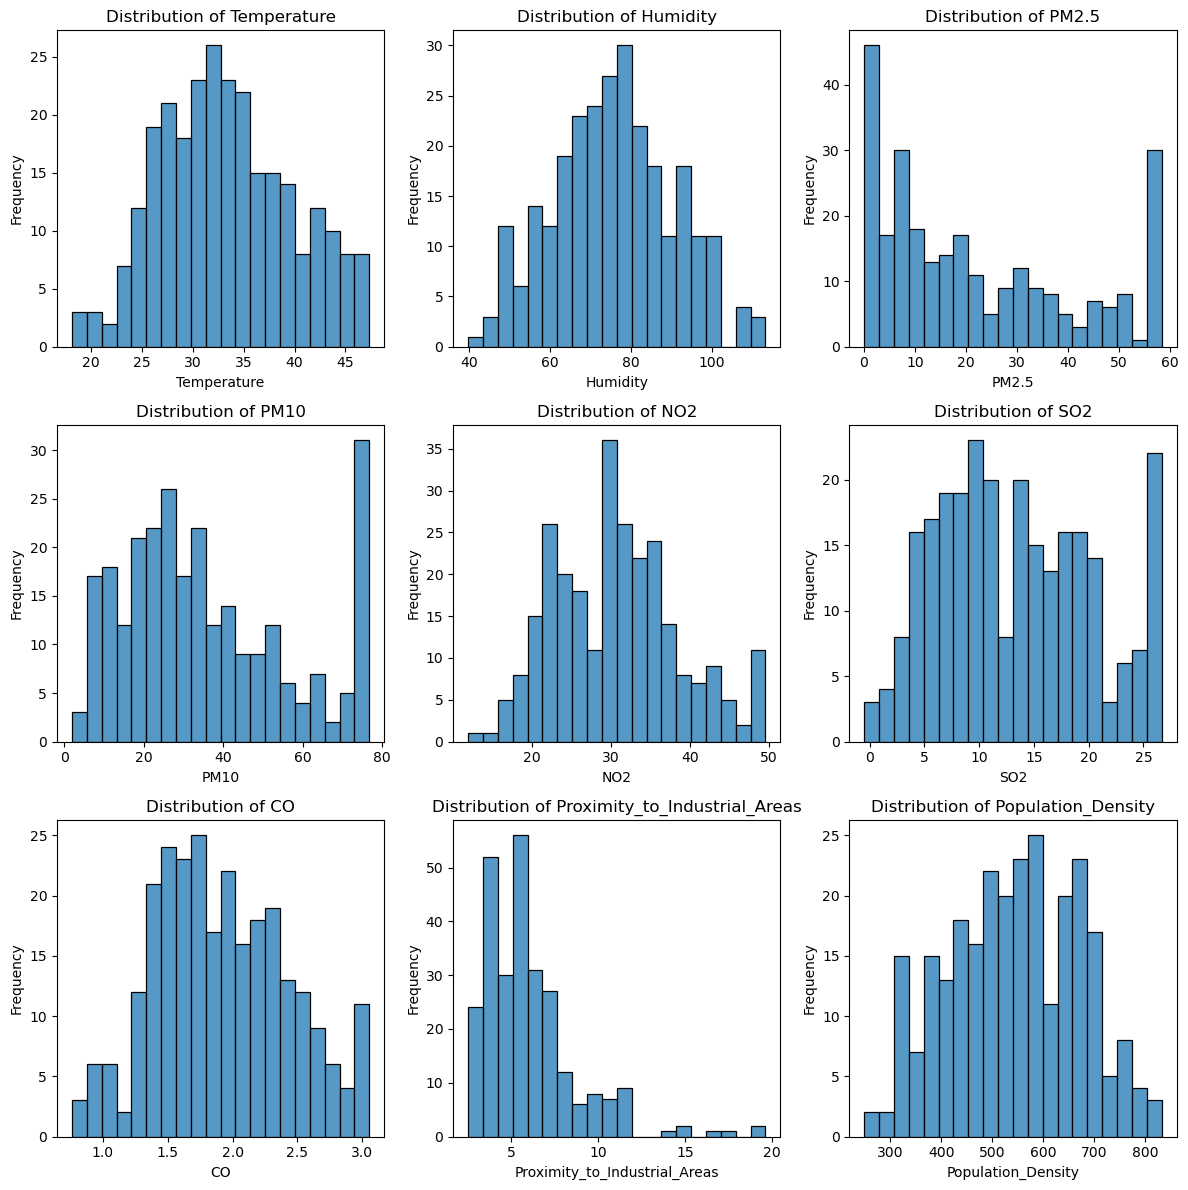

In [64]:
features = df_encoded.drop(columns=["Air Quality Encoded"]).columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12), sharex=False, sharey=False)

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.histplot(error_analysis_df[feature], kde=False, bins=20, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Decision Trees

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt_model = DecisionTreeClassifier(random_state=42)

In [67]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'random_state': [42]
}

In [68]:
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, 
                           cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

In [69]:
start_time = time.time()

grid_search.fit(X_train, y_train)

end_time = time.time()

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [70]:
fit_time = end_time - start_time

print(f"Decision Tree Fit Time: {fit_time:.2f} seconds")

Decision Tree Fit Time: 0.82 seconds


In [71]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}
Best Score:  0.9258666666666666


In [72]:
best_dt_model = DecisionTreeClassifier(**best_params)

In [73]:
start_time = time.time()

best_dt_model.fit(X_train, y_train)

end_time = time.time()

In [74]:
fit_time = end_time - start_time

print(f"Decision Tree Fit Time: {fit_time} seconds")

Decision Tree Fit Time: 0.025957107543945312 seconds


In [75]:
y_pred_dt = best_dt_model.predict(X_test)

#### Analysis

In [76]:
acc_dt = accuracy_score(y_test, y_pred_dt)

acc_dt

0.9192

In [77]:
confusion_matrix(y_test, y_pred_dt)

array([[505,   3,   0,   0],
       [  2, 349,  30,   0],
       [  0,  12, 199,  18],
       [  0,   0,  36,  96]], dtype=int64)

In [78]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       508
           1       0.96      0.92      0.94       381
           2       0.75      0.87      0.81       229
           3       0.84      0.73      0.78       132

    accuracy                           0.92      1250
   macro avg       0.89      0.88      0.88      1250
weighted avg       0.92      0.92      0.92      1250



In [79]:
# Overfitting check

y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.9698666666666667
Test Accuracy: 0.9192


There is no significant overfitting issue in this model.

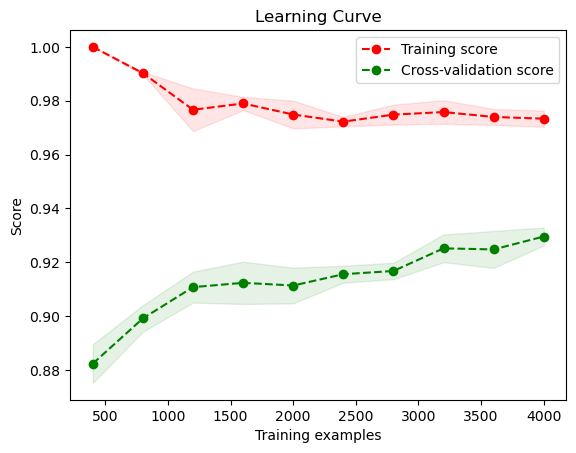

In [80]:
# Learning Curve 

train_sizes, train_scores, test_scores = learning_curve(best_dt_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, "o--", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o--", color="g", label="Cross-validation score")
plt.fill_between (train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between (train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

In [81]:
# Error Analysis

misclassified = X_test[y_test != y_pred_knn]

error_analysis_df = pd.DataFrame(misclassified, columns=X.columns)
error_analysis_df["Actual"] = y_test[y_test != y_pred_knn]
error_analysis_df["Predicted"] = y_pred_rf[y_test != y_pred_knn]

print(error_analysis_df)

      Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
2653         25.4      78.6    4.1   6.7  21.3   9.1  1.40   
1600         23.3      70.8   23.7  36.1  23.5   8.4  1.43   
1117         31.8      67.3   17.7  23.4  22.1   9.6  2.49   
486          32.3      63.1    3.0  12.2  18.1  12.3  1.36   
2515         33.3      73.0    7.0  23.0  24.2   6.6  1.83   
...           ...       ...    ...   ...   ...   ...   ...   
1164         25.7      71.4   13.9  18.5  22.2   6.4  1.41   
1162         27.4      77.3    0.7  12.2  25.3   5.3  1.57   
3694         25.8      76.1   51.9  64.4  24.9  16.5  1.93   
3153         24.6      78.6    8.0  12.4  23.1   4.4  0.98   
452          40.9      81.8    0.7  15.7  27.7  17.9  1.82   

      Proximity_to_Industrial_Areas  Population_Density  Actual  Predicted  
2653                           10.1               543.0       1          1  
1600                            7.6               450.0       1          1  
1117                    

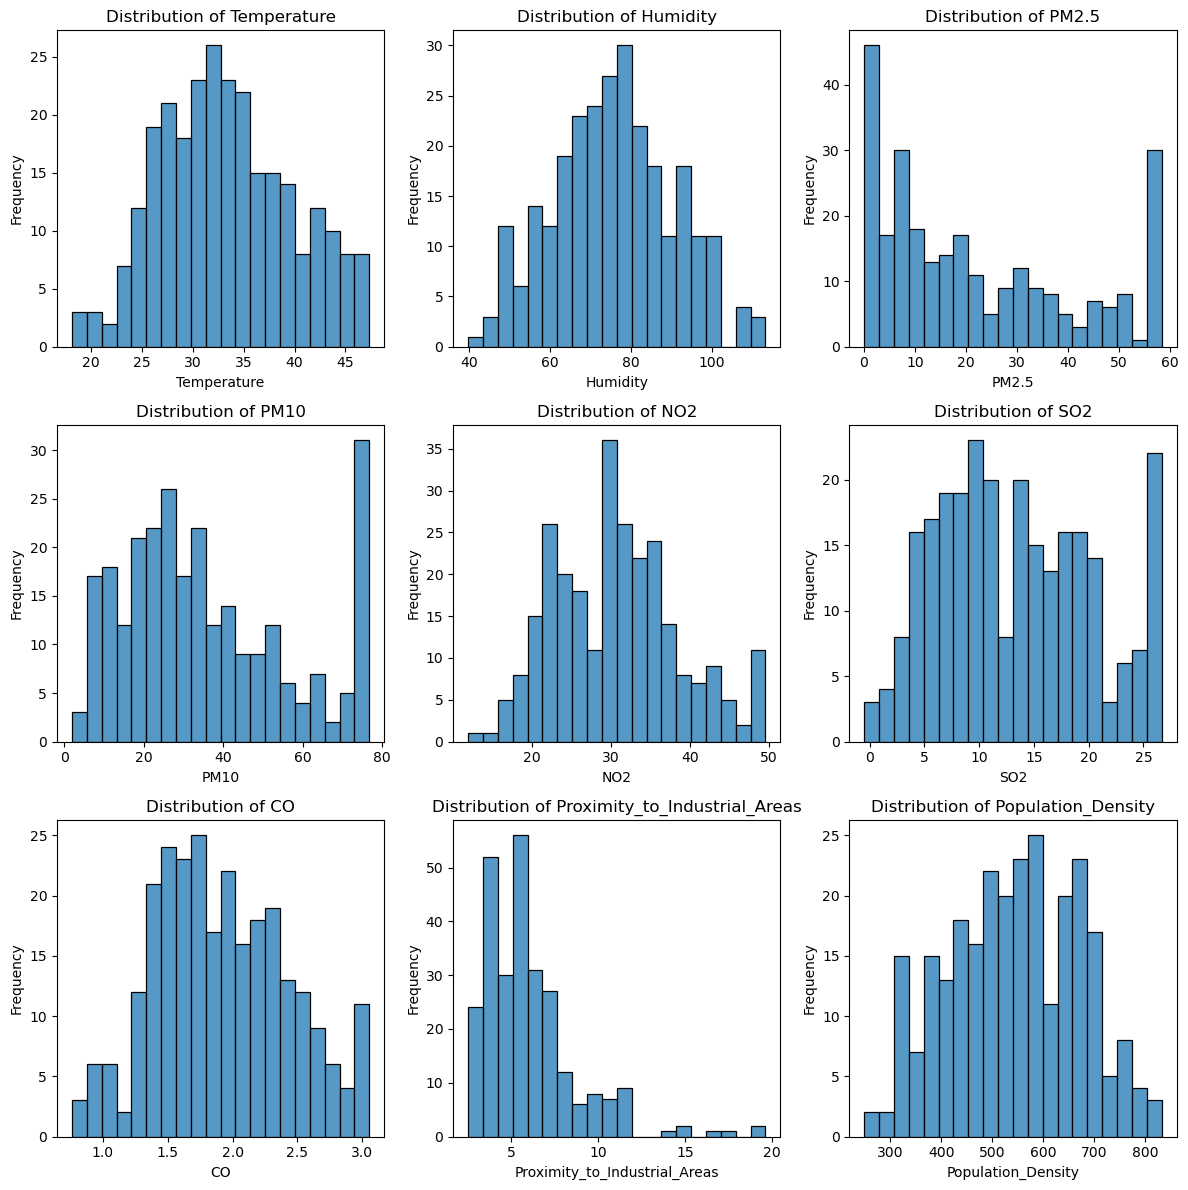

In [82]:
features = df_encoded.drop(columns=["Air Quality Encoded"]).columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12), sharex=False, sharey=False)

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.histplot(error_analysis_df[feature], kde=False, bins=20, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Predictions

We trained our dataset with 3 different techniques. Now, we're going to compare our models and make predictions.

#### Comparison

In [83]:
comparison_df = pd.DataFrame({
    "Model": ["Random Forests", "KNN", "Decision Trees"],
    "Accuracy" : [acc_rf, acc_knn, acc_dt]
})

In [84]:
comparison_df

,Model,Accuracy
0,Random Forests,0.9528
1,KNN,0.7848
2,Decision Trees,0.9192


Let's make predictions with RF and KNN models.

In [85]:
df_encoded = df_encoded.drop(columns=["Air Quality Encoded"])

In [86]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,5000.0,29.977300,6.562749,13.40,25.10,29.00,34.000,47.3500
Humidity,5000.0,70.036240,15.804219,36.00,58.30,69.80,80.300,113.3000
PM2.5,5000.0,17.993440,17.198269,0.00,4.60,12.00,26.100,58.3500
PM10,5000.0,28.215900,20.602156,-0.20,12.30,21.70,38.100,76.8000
NO2,5000.0,26.364280,8.753225,7.40,20.10,25.30,31.900,49.6000
SO2,5000.0,9.911630,6.430183,-6.20,5.10,8.00,13.725,26.6625
CO,5000.0,1.498345,0.539610,0.65,1.03,1.41,1.840,3.0550
Proximity_to_Industrial_Areas,5000.0,8.419160,3.587946,2.50,5.40,7.90,11.100,19.6500
Population_Density,5000.0,497.406700,152.704773,188.00,381.00,494.00,600.000,928.5000


In [87]:
data = {
    'Temperature': [60],
    'Humidity': [60],
    'PM2.5': [60],
    'PM10': [60],
    'NO2': [60],
    'SO2': [20],
    'CO': [10],
    'Proximity_to_Industrial_Areas': [60],
    'Population_Density': [900]
}

In [88]:
print(data)

{'Temperature': [60], 'Humidity': [60], 'PM2.5': [60], 'PM10': [60], 'NO2': [60], 'SO2': [20], 'CO': [10], 'Proximity_to_Industrial_Areas': [60], 'Population_Density': [900]}


In [89]:
data_df = pd.DataFrame(data)

In [90]:
data_with_means = {}

for feature in enumerate(df_encoded.columns):
    data_with_means[feature[1]] = [df_encoded[feature[1]].mean()]

In [91]:
print(data_with_means)

{'Temperature': [29.9773], 'Humidity': [70.03624], 'PM2.5': [17.993440000000003], 'PM10': [28.2159], 'NO2': [26.364280000000004], 'SO2': [9.911629999999999], 'CO': [1.498345], 'Proximity_to_Industrial_Areas': [8.41916], 'Population_Density': [497.4067]}


In [92]:
data_with_means_df = pd.DataFrame(data_with_means)

In [93]:
labels = {0: "Good", 1: "Moderate", 2: "Poor", 3: "Hazardous"}

In [94]:
prediction_rf = best_rf_model.predict(data_df)
prediction_rf_with_means = best_rf_model.predict(data_with_means_df)

result_rf = labels[prediction_rf[0]]
result_rf_with_means = labels[prediction_rf_with_means[0]]

print("--- RF ---")
print("Predicted Air Quality: ", result_rf)
print("Predicted Air Quality (with mean values): ", result_rf_with_means)

--- RF ---
Predicted Air Quality:  Hazardous
Predicted Air Quality (with mean values):  Moderate


In [95]:
prediction_knn = best_knn_model.predict(data_df)
prediction_knn_with_means = best_knn_model.predict(data_with_means_df)

result_knn = labels[prediction_knn[0]]
result_knn_with_means = labels[prediction_knn_with_means[0]]

print("--- KNN ---")
print("Predicted Air Quality: ", result_knn)
print("Predicted Air Quality (with mean values): ", result_knn_with_means)

--- KNN ---
Predicted Air Quality:  Hazardous
Predicted Air Quality (with mean values):  Moderate
